# How to import and convert data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')

To handle other format read_json(), read_html(), read_excel()

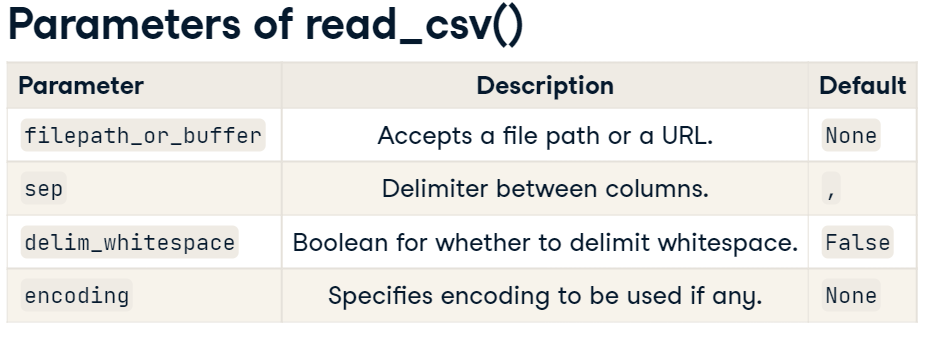

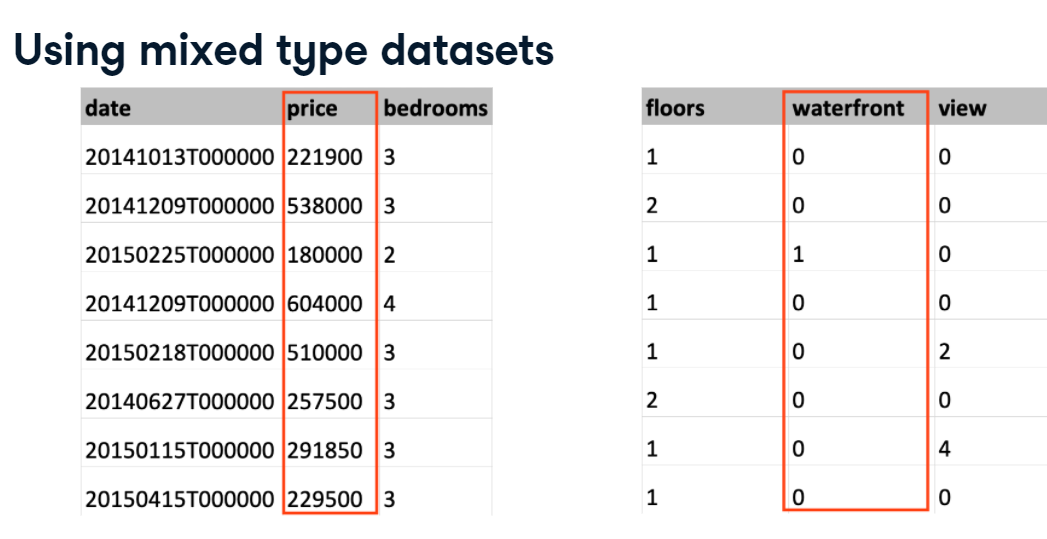

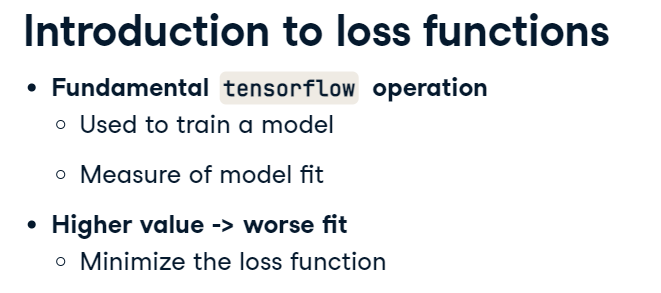

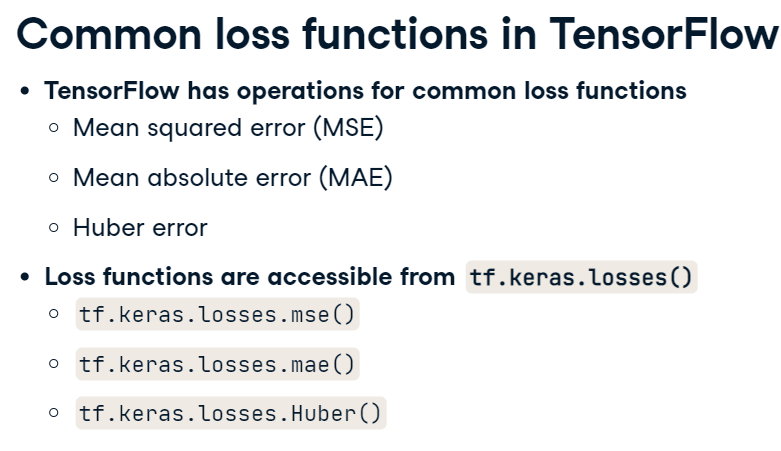



In [3]:
# convert price 
price = np.array(data['price'], np.float32)

# convert waterfront to boolean
waterfront = np.array(data['waterfront'], np.bool)


C:\Users\aBr\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [5]:
import tensorflow as tf
# convert price 
price = tf.cast(data['price'], tf.float32)

# convert waterfront to boolean
waterfront = tf.cast(data['waterfront'], tf.bool)

# Loss function

In [6]:
kc_sample = pd.read_csv('./data/loss_price.csv')
price = kc_sample['price'].to_numpy()
predictions = kc_sample['pred'].to_numpy()

In [8]:
# MSE loss

loss = tf.keras.losses.mse(price,predictions)
# Print the mean squared error (mse)
print(loss.numpy())

141171604777.12717


In [9]:
# Compute the mean squared error (mse)
loss = tf.keras.losses.mae(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

268827.99302088


You may have noticed that the MAE was much smaller than the MSE, even though price and predictions were the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly.


## Modifying the loss function


In the previous exercise, you defined a tensorflow loss function and then evaluated it once for a set of actual and predicted values. In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow.

In [10]:
features = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
targets = tf.constant([2, 4, 6, 8, 10], dtype=tf.float32)

In [11]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, tf.float32)

# Define the model
def model(scalar, features=features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features=features, targets=targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0
